<a href="https://colab.research.google.com/github/mart-anthony-stark/Machine-Learning-and-Deep-Learning/blob/main/Fake_News_Detection_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle
import nltk

# Data Loading

In [68]:
true_df = pd.read_csv('True.csv', engine='python')
fake_df = pd.read_csv('Fake.csv', engine='python')

In [69]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [70]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [71]:
print("True data shape:", true_df.shape)
print("Fake data shape:", fake_df.shape)

True data shape: (21417, 4)
Fake data shape: (23481, 4)


In [72]:
true_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [73]:
fake_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [74]:
true_df['target'] = 'true'
fake_df['target'] = 'fake'

In [75]:
true_df.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [76]:
fake_df.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


## Combine Dataset (True, Fake)

In [77]:
df = pd.concat([true_df, fake_df]).reset_index(drop=True)
df.shape

(44898, 5)

In [78]:
df.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [79]:
df.tail()

,title,text,subject,date,target
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",fake
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",fake
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",fake
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",fake
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",fake


## Shuffle dataset

In [80]:
df = shuffle(df).reset_index(drop=True)

In [81]:
df.head()

,title,text,subject,date,target
0,JUST IN: Anti-Putin Banker Claims Firm Tied To...,One of the many targets of the opposition rese...,Government News,"Nov 13, 2017",fake
1,[VIDEO] Obama Needed A Girl To Take Down Mitt ...,Because Obama s doing such a great job keeping...,Government News,"Nov 3, 2015",fake
2,UPDATE: WHY UNIV OF MICHIGAN REPLACED SCHEDULE...,HUGE NEWS: The head coach of the University of...,left-news,"Apr 8, 2015",fake
3,BRILLIANT! Why “Democratic” Socialism Doesn’t ...,This is Stephen Crowder at his best So smart a...,Government News,"Apr 30, 2016",fake
4,Emirates stops flying to Tunisia in row over b...,TUNIS (Reuters) - Dubai airline Emirates will ...,worldnews,"December 24, 2017",true


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


# Data Preprocessing

Removing unnecessary columns

In [83]:
df.drop(['date', 'title'], axis=1,inplace=True)
df.head()

,text,subject,target
0,One of the many targets of the opposition rese...,Government News,fake
1,Because Obama s doing such a great job keeping...,Government News,fake
2,HUGE NEWS: The head coach of the University of...,left-news,fake
3,This is Stephen Crowder at his best So smart a...,Government News,fake
4,TUNIS (Reuters) - Dubai airline Emirates will ...,worldnews,true


## Converting text to lowercase

In [84]:
df['text'] = df['text'].apply(lambda text: text.lower())
df.head()

,text,subject,target
0,one of the many targets of the opposition rese...,Government News,fake
1,because obama s doing such a great job keeping...,Government News,fake
2,huge news: the head coach of the university of...,left-news,fake
3,this is stephen crowder at his best so smart a...,Government News,fake
4,tunis (reuters) - dubai airline emirates will ...,worldnews,true


## Removing punctuations

In [85]:
import string

def remove_punctuation(text):
  all_list = [char for char in text if char not in string.punctuation]
  new_str = ''.join(all_list)
  return new_str

df['text'] = df['text'].apply(remove_punctuation)
df.head()

,text,subject,target
0,one of the many targets of the opposition rese...,Government News,fake
1,because obama s doing such a great job keeping...,Government News,fake
2,huge news the head coach of the university of ...,left-news,fake
3,this is stephen crowder at his best so smart a...,Government News,fake
4,tunis reuters dubai airline emirates will sto...,worldnews,true


## Removing stopwords
Stop words are the words in a stop list which are filtered out before or after processing of natural language data because they are insignificant. Examples of stop words in English are “a”, “the”, “is”, “are” and etc.

In [89]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,text,subject,target
0,one many targets opposition research firm fusi...,Government News,fake
1,obama great job keeping putin check right pres...,Government News,fake
2,huge news head coach university michigan footb...,left-news,fake
3,stephen crowder best smart funny,Government News,fake
4,tunis reuters dubai airline emirates stop flyi...,worldnews,true


# Exploratory Data Analysis

## articles per subject count

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


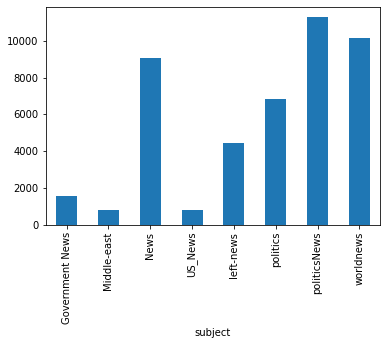

In [93]:
text_by_sub = df.groupby(['subject'])['text'].count()
print(text_by_sub)
text_by_sub.plot(kind="bar")
plt.show()

## fake and real articles count

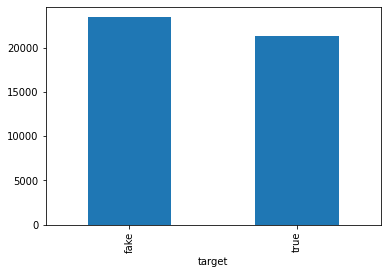

In [96]:
fake_real = df.groupby('target')['text'].count()
fake_real.plot(kind='bar')
plt.show()

## Wordcloud appearances

In [100]:
from wordcloud import WordCloud

is_fake = df['target'] == 'fake'
fake_data = df[is_fake]
real_data = df[~is_fake]

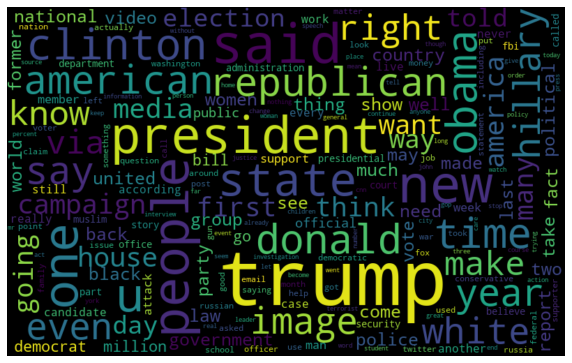

In [104]:
all_words = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

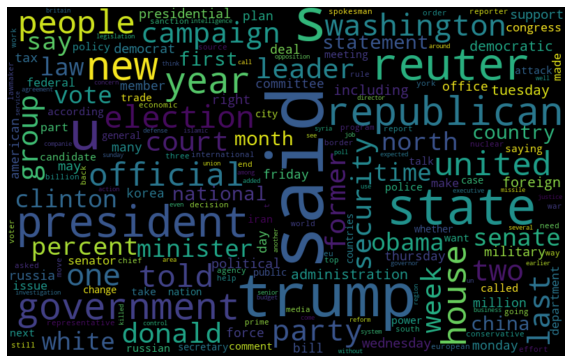

In [105]:
all_words = ' '.join([text for text in real_data.text])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Most frequent words counter  

In [107]:
 from nltk import tokenize

 token_space = tokenize.WhitespaceTokenizer()
 
 def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

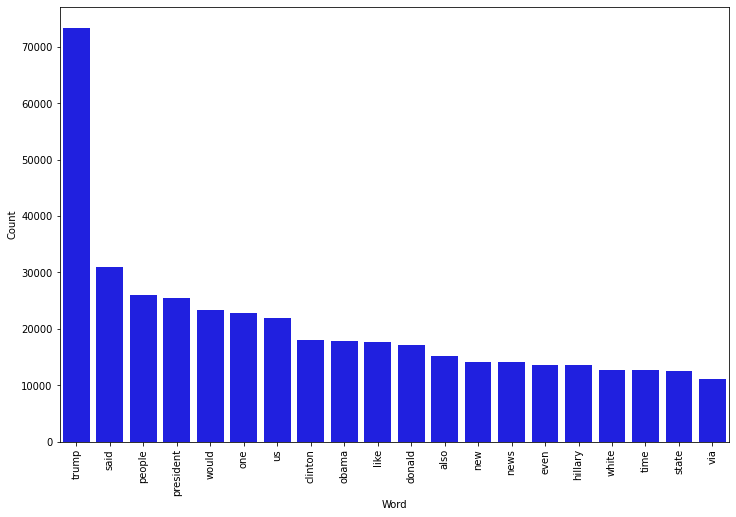

In [108]:
counter(df[df["target"] == "fake"], "text", 20)

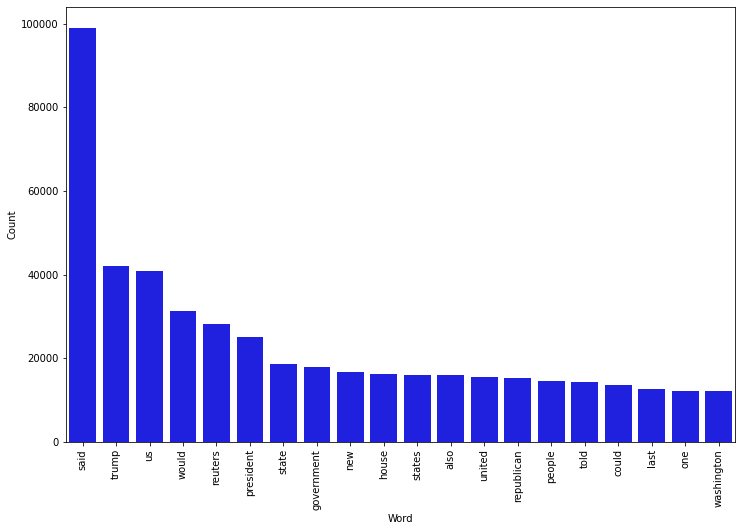

In [109]:
counter(df[df["target"] == "true"], "text", 20)

# Model Building

In [110]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

## Data Splitting

In [111]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

In [114]:
X_train.head()

36335                                                     
12384    donald trump attacking obamacare instead greed...
24419    washington reuters us president donald trump’s...
24740    katrina pierson donald trump official campaign...
27039    kuwait reuters qatar emir said tuesday hoped s...
Name: text, dtype: object

In [115]:
y_train.head()

36335    fake
12384    fake
24419    true
24740    fake
27039    true
Name: target, dtype: object

## Decision Tree

In [123]:
from sklearn.tree import DecisionTreeClassifier

# building pipeline
# Vectorization and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])

model = pipe.fit(X_train, y_train)

predictions = pipe.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, predictions)*100,2)))

accuracy: 99.76%


Confusion matrix, without normalization


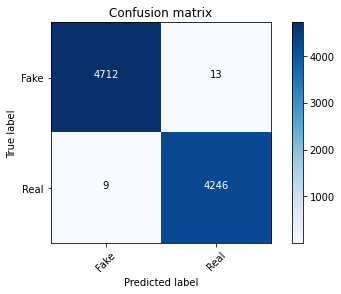

In [124]:
cm = metrics.confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])